In [7]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


In [2]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [3]:
# Check out the insurance dataset
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
import pandas as pd

def get_string_and_nonstring_cols(df):
    string_cols = []
    nonstring_cols = []
    for col in df.columns:
        if df[col].dtype == object:
            string_cols.append(col)
        else:
            nonstring_cols.append(col)
    return string_cols, nonstring_cols


In [11]:
string_cols, nonstring_cols = get_string_and_nonstring_cols(insurance)
print(string_cols)
print(nonstring_cols)


['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'charges']


In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

nonstring_cols.remove("charges")

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), nonstring_cols), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), string_cols)
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [14]:
# Non-normalized and non-one-hot encoded data example
X_train.loc[7]

age                37
sex            female
bmi             27.74
children            3
smoker             no
region      northwest
Name: 7, dtype: object

In [29]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# 2. Preprocess the dataset
# Encode categorical variables
cat_columns = ['sex', 'smoker', 'region']
encoder = OneHotEncoder()
encoded_cat_data = pd.DataFrame(encoder.fit_transform(data[cat_columns]).toarray())

# Normalize numerical variables
num_columns = ['age', 'bmi', 'children']
scaler = StandardScaler()
data[num_columns] = scaler.fit_transform(data[num_columns])

# Merge encoded categorical data and normalized numerical data
data = data.drop(cat_columns, axis=1)
data = pd.concat([data, encoded_cat_data], axis=1)

# 3. Split the dataset into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create and compile the TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

# 5. Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

# 6. Evaluate the model and make predictions
model.evaluate(X_test, y_test)
predictions = model.predict(X_test)


Epoch 1/300
27/27 [==============================] - 1s 7ms/step - loss: 13518.1562 - val_loss: 12654.1914
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 13515.9326 - val_loss: 12650.4619
Epoch 3/300
27/27 [==============================] - 0s 3ms/step - loss: 13508.5527 - val_loss: 12637.1895
Epoch 4/300
27/27 [==============================] - 0s 3ms/step - loss: 13484.0352 - val_loss: 12595.0049
Epoch 5/300
27/27 [==============================] - 0s 3ms/step - loss: 13410.9209 - val_loss: 12481.5098
Epoch 6/300
27/27 [==============================] - 0s 3ms/step - loss: 13241.7539 - val_loss: 12229.9004
Epoch 7/300
27/27 [==============================] - 0s 3ms/step - loss: 12877.2012 - val_loss: 11740.9443
Epoch 8/300
27/27 [==============================] - 0s 2ms/step - loss: 12228.6201 - val_loss: 10911.1953
Epoch 9/300
27/27 [==============================] - 0s 3ms/step - loss: 11250.5967 - val_loss: 9838.0771
Epoch 10/300
27/27 [==================

In [30]:
model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 1ms/step - loss: 1877.9481


1877.9481201171875

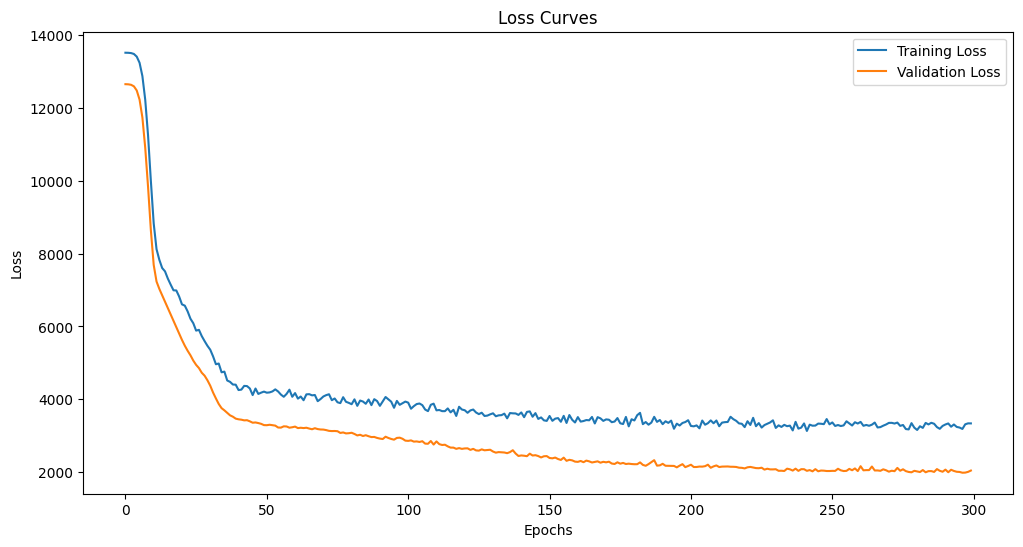

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset, split the dataset, and preprocess the dataset (same as before)

# Train the model and store the history

# Evaluate the model and make predictions (same as before)

# Plot the training and validation loss curves
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curves')
plt.legend()
plt.show()


In [24]:
model.evaluate(X_test, y_test)


9/9 [==============================] - 0s 4ms/step - loss: 1793.8535


1793.853515625

In [19]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# 1. Load the dataset
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
data = pd.read_csv(url)

# 2. Split the dataset into training and testing sets
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Preprocess the dataset
# Define column transformer with MinMaxScaler for numerical variables and OneHotEncoder for categorical variables
preprocessor = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(), ['sex', 'smoker', 'region'])
)

# Fit and transform the training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform the testing data
X_test_processed = preprocessor.transform(X_test)

# 4. Create and compile an improved TensorFlow model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train_processed.shape[1]]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_absolute_error')

# 5. Train the model
model.fit(X_train_processed, y_train, epochs=200, batch_size=32)

# 6. Evaluate the model and make predictions
model.evaluate(X_test_processed, y_test)
predictions = model.predict(X_test_processed)


Epoch 1/200
34/34 [==============================] - 1s 1ms/step - loss: 13344.9199
Epoch 2/200
34/34 [==============================] - 0s 1ms/step - loss: 13337.5439
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13299.0479
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13157.1182
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 12762.5049
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 11921.5322
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 10567.9980
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 9232.0508
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 8346.6367
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 8120.5776
Epoch 11/200
34/34 [==============================] - 0s 1ms/step - loss: 7993.1831
Epoch 12/200
34/34 [==============================] - 0s 1ms/step - loss: 7934